In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm, TwoSlopeNorm
from pathlib import Path
from tqdm import tqdm
from glob import glob
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
import seaborn as sns
import yaml

plt.rcParams['figure.dpi'] = 150

In [22]:
folder = "AquaHkmLabSea2022b"
filepath = "/home/eefjg/OneDrive/Leeds/PhD/Data/MODIS/"+folder

#filename = "embs.nc"
#filename = "embs_no_land.nc"
#filename = "embs_no_ice.nc" # This data also has no land
filename = "embs_cao.nc"

In [23]:
tiles_ds = xr.open_dataset(filepath+"/"+filename)
da_embs = tiles_ds["embs"]

### How far away are the distant tiles?

In [24]:
# Calculate Euclidean distance between each neighbour and its anchor
# Calculate Euclidean distance between each distant and its anchor
# Plot the two distributions of these distances and compare

neigh_dist = np.linalg.norm(da_embs.sel(tile_type='neighbor') - da_embs.sel(tile_type='anchor'), axis=1)
dist_dist = np.linalg.norm(da_embs.sel(tile_type='distant') - da_embs.sel(tile_type='anchor'), axis=1)
diff_dist = dist_dist - neigh_dist

/home/eefjg/miniconda3/envs/main/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eefjg/miniconda3/envs/main/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/eefjg/miniconda3/envs/main/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


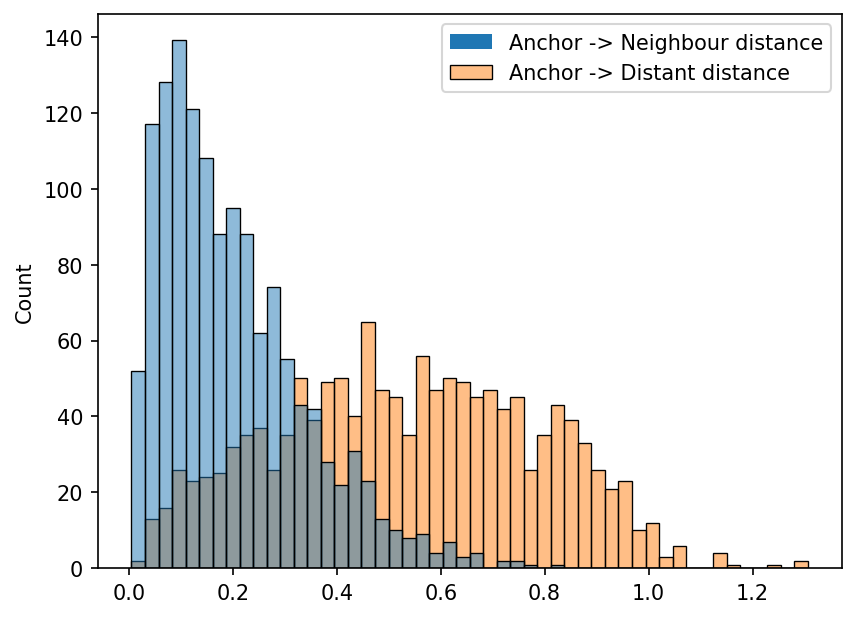

In [25]:
sns.histplot([neigh_dist, dist_dist], bins=50)
plt.legend(["Anchor -> Neighbour distance", "Anchor -> Distant distance"])

/home/eefjg/miniconda3/envs/main/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

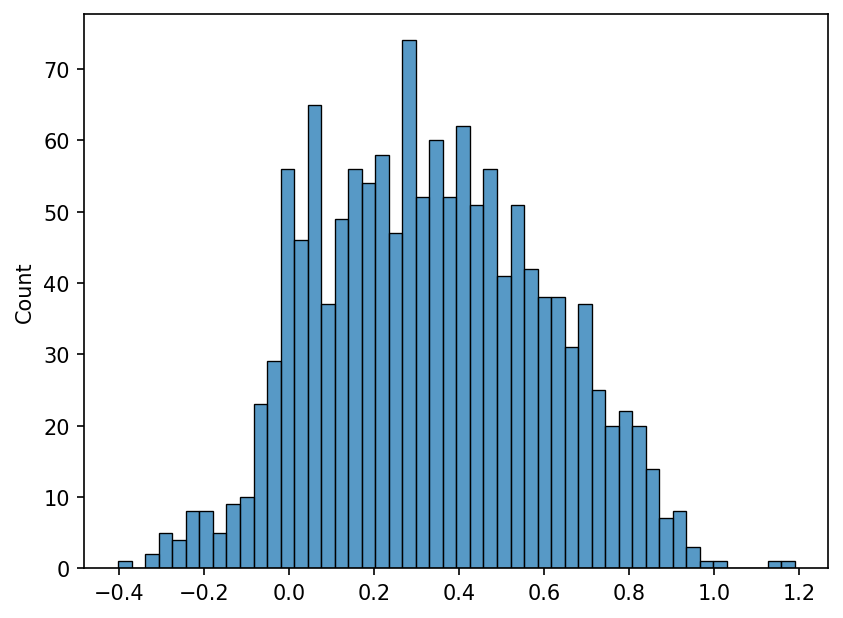

In [26]:
sns.histplot(diff_dist, bins=50)

In [27]:
# What proportion of the time is the distant closer than the neighbour?

np.sum(diff_dist < 0) / len(diff_dist)

0.09927536231884058

In [28]:
# I wonder if there's a threshold value of this for triplet training to be effective.
# Improves significantly as you take out land and ice